# Seminar 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In the following we will take a look at filtering. We will first create an sample example array in which all the elements are ordered from the smallest to the largest value.


In [2]:
test = np.arange(11)
print test

[ 0  1  2  3  4  5  6  7  8  9 10]


Following, we will substitue one element with a random out of order element.

In [3]:
test[5] = 20
print test

[ 0  1  2  3  4 20  6  7  8  9 10]


Let's find the outlier element and it's index.

In [4]:
outLi = []   ### List of outlier indexes
outL  = []   ### List of outlier values
for i in range(0,test.shape[0]-1):
    if test[i] > test[i+1]:
        outLi.append(i)   ### adds the index of the oulier to the list.
        outL.append(test[i])   ### adds the value of the oulier to the list.
        
print outLi
print outL

[5]
[20]


Now we have found the outlier value and it's index. We can remove the outlier as follows:

In [5]:
testF = np.delete(test, outLi)
print test
print testF

[ 0  1  2  3  4 20  6  7  8  9 10]
[ 0  1  2  3  4  6  7  8  9 10]


This works well for integers and a small amount of outliers. However, the algorithm will probably not work well for lists with large amounts of outliers. Therefore, we will need to find a better solution. Let's take a look at the first column from the data of last week and check for ouliers.

In [6]:
data = np.genfromtxt("jdata4_err0.txt")

Let's find the background. Usually, it would be better to accurately fit the data. This time we will keep it simple. and aproximate the background with a line, which spans from the first to the last element.

In [7]:
time = data[:,0]  
Back = np.linspace(time.min(),time.max(),time.shape[0])

plot data and background.

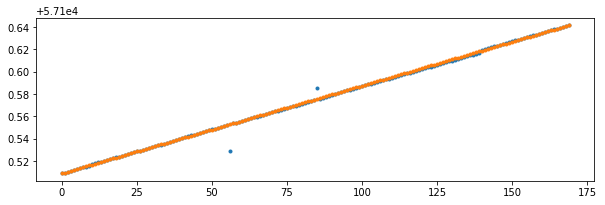

In [8]:
plt.figure(figsize = (10,3))
plt.plot(time,".")
plt.plot(Back,".")
plt.show()

In the next step, we will subtract the background and find the mean and standard diviation of the subtracted data.

In [9]:
noBack = time - Back
MEAN   = noBack.mean()
STD    = noBack.std()
print MEAN, STD       ### mean and standard diviation  

-0.000305588237568 0.00201942217467


Next, we plot the subtragted data and it's mean as well as standard diviation times three.

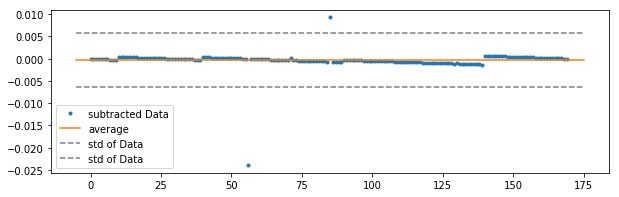

In [10]:
plt.figure(figsize = (10,3))
plt.plot(noBack,".", label = "subtracted Data")
plt.plot([-5,noBack.shape[0]+5], [MEAN,MEAN], "-", label = "average")
plt.plot([-5,noBack.shape[0]+5], [MEAN+3.*STD,MEAN+3.*STD], 
         "k--", label = "std of Data", alpha = 0.5)
plt.plot([-5,noBack.shape[0]+5], [MEAN-3.*STD,MEAN-3.*STD], 
         "k--", label = "std of Data", alpha = 0.5)
plt.legend()
plt.show()

We can identify the ouliers and remove them. Therefore, we copy the list , find the elements larger than three sigma and substitue them with NAN. The replacement with NAN will ensure that the list keeps it's length.

In [11]:
noBackup = noBack.copy()
noBackup[noBack>(MEAN+3.*STD)] = np.NAN  
noBackup[noBack<(MEAN-3.*STD)] = np.NAN

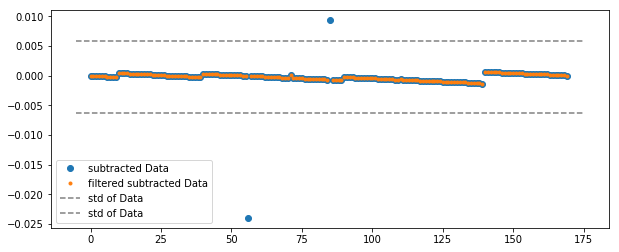

In [12]:
plt.figure(figsize = (10,4))
plt.plot(noBack,"o", label = "subtracted Data")
plt.plot(noBackup,".", label = "filtered subtracted Data")
#plt.plot([-5,noBack.shape[0]+5], [MEAN,MEAN], "-", label = "average")
plt.plot([-5,noBack.shape[0]+5], [MEAN+3.*STD,MEAN+3.*STD], 
         "k--", label = "std of Data", alpha = 0.5)
plt.plot([-5,noBack.shape[0]+5], [MEAN-3.*STD,MEAN-3.*STD], 
         "k--", label = "std of Data", alpha = 0.5)
plt.legend()
plt.show()

## Summary

The follwing four lines summerise the steps taken to remove outliers from simple linear data.

In [13]:
B = time - np.linspace(time.min(),time.max(),time.shape[0])
timeC = time.copy()
timeC[B>(B.mean()+3.*B.std())] = np.NAN
timeC[B<(B.mean()-3.*B.std())] = np.NAN

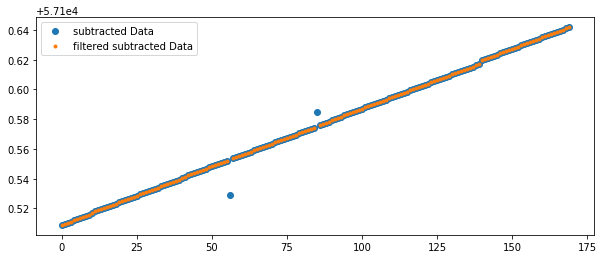

In [14]:
plt.figure(figsize = (10,4))
plt.plot(time,"o", label = "subtracted Data")
plt.plot(timeC,".", label = "filtered subtracted Data")
plt.legend()
plt.show()

Next week, we will talk about data fitting.